Welcome to the CTD project, data found on OOI website

Import Packages

In [306]:
import requests
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()
import numpy as np

Define Functions

In [307]:
#Time Processing Routine
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)

In [308]:
#Function to count number of dives
def getNumberofDives(depth):
    
    bottom = max(depth)
    atBottom = False
    diveCount = 0
    
    for i in range(0, len(depth)):
        
        if(depth[i] > 0.95 * bottom and not atBottom):
            atBottom = True
            
        if(depth[i] < 0.95 * bottom and atBottom):
            atBottom = False
            diveCount +=1
            
    return diveCount

In [309]:
#define a moving average function
def moving_average(x,y,step_size=.1,bin_size=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        items_in_bin = y[(x>(bin_center-bin_size*0.5) ) & (x<(bin_center+bin_size*0.5))]
        bin_avg[index] = np.mean(items_in_bin)

    return bin_centers,bin_avg

M2M Generate Data

In [310]:
USERNAME ='OOIAPI-9KGBPX8BI2AZMB'
TOKEN= 'TEMP-TOKEN-EC461KMZPUNKXK'
DATA_API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

Specify Request

Winter

In [311]:
data_request_url1 = DATA_API_BASE_URL+\
                    'CE04OSPS/'+\
                    'SF01B/'+\
                    '2A-CTDPFA107/'+\
                    'streamed/'+\
                    'ctdpf_sbe43_sample'+'?'+\
                    'beginDT=2019-01-01T08:00:00.000Z&'+\
                    'endDT=2019-01-02T08:00:00.000Z&'+\
                    'limit=1000'

In [312]:
data_request_url2 = DATA_API_BASE_URL+\
                    'CE04OSPD/'+\
                    'DP01B/'+\
                    '01-CTDPFL105/'+\
                    'recovered_wfp/'+\
                    'dpc_ctd_instrument_recovered'+'?'+\
                    'beginDT=2015-12-10T08:00:00.000Z&'+\
                    'endDT=2015-12-11T08:00:00.000Z&'+\
                    'limit=1000'

In [313]:
data_request_url3 = DATA_API_BASE_URL+\
                    'RS01SBPS/'+\
                    'SF01A/'+\
                    '2A-CTDPFA102/'+\
                    'streamed/'+\
                    'ctdpf_sbe43_sample'+'?'+\
                    'beginDT=2019-01-01T08:00:00.000Z&'+\
                    'endDT=2019-01-02T08:00:00.000Z&'+\
                    'limit=1000'

In [314]:
data_request_url4 = DATA_API_BASE_URL+\
                    'RS01SBPD/'+\
                    'DP01A/'+\
                    '01-CTDPFL104/'+\
                    'recovered_wfp/'+\
                    'dpc_ctd_instrument_recovered'+'?'+\
                    'beginDT=2015-12-22T08:00:00.000Z&'+\
                    'endDT=2015-12-23T08:00:00.000Z&'+\
                    'limit=1000'

In [315]:
data_request_url5 = DATA_API_BASE_URL+\
                    'RS03AXPS/'+\
                    'SF03A/'+\
                    '2A-CTDPFA302/'+\
                    'streamed/'+\
                    'ctdpf_sbe43_sample'+'?'+\
                    'beginDT=2020-01-01T08:00:00.000Z&'+\
                    'endDT=2020-01-02T08:00:00.000Z&'+\
                    'limit=1000'

In [316]:
data_request_url6 = DATA_API_BASE_URL+\
                    'RS03AXPD/'+\
                    'DP03A/'+\
                    '01-CTDPFL304/'+\
                    'recovered_inst/'+\
                    'dpc_ctd_instrument_recovered'+'?'+\
                    'beginDT=2020-01-01T08:00:00.000Z&'+\
                    'endDT=2020-01-02T08:00:00.000Z&'+\
                    'limit=1000'

Summer

In [317]:
data_request_url7 = DATA_API_BASE_URL+\
                    'CE04OSPS/'+\
                    'SF01B/'+\
                    '2A-CTDPFA107/'+\
                    'streamed/'+\
                    'ctdpf_sbe43_sample'+'?'+\
                    'beginDT=2019-06-09T08:00:00.000Z&'+\
                    'endDT=2019-06-10T08:00:00.000Z&'+\
                    'limit=1000'

In [318]:
data_request_url8 = DATA_API_BASE_URL+\
                    'CE04OSPD/'+\
                    'DP01B/'+\
                    '01-CTDPFL105/'+\
                    'recovered_inst/'+\
                    'dpc_ctd_instrument_recovered'+'?'+\
                    'beginDT=2019-07-15T08:00:00.000Z&'+\
                    'endDT=2019-07-16T08:00:00.000Z&'+\
                    'limit=1000'

In [319]:
data_request_url9 = DATA_API_BASE_URL+\
                    'RS01SBPS/'+\
                    'SF01A/'+\
                    '2A-CTDPFA102/'+\
                    'streamed/'+\
                    'ctdpf_sbe43_sample'+'?'+\
                    'beginDT=2019-06-10T08:00:00.000Z&'+\
                    'endDT=2019-06-11T08:00:00.000Z&'+\
                    'limit=1000'

In [320]:
data_request_url10 = DATA_API_BASE_URL+\
                    'RS01SBPD/'+\
                    'DP01A/'+\
                    '01-CTDPFL104/'+\
                    'recovered_inst/'+\
                    'dpc_ctd_instrument_recovered'+'?'+\
                    'beginDT=2019-07-16T08:00:00.000Z&'+\
                    'endDT=2019-07-17T08:00:00.000Z&'+\
                    'limit=1000'

In [321]:
data_request_url11 = DATA_API_BASE_URL+\
                    'RS03AXPS/'+\
                    'SF03A/'+\
                    '2A-CTDPFA302/'+\
                    'streamed/'+\
                    'ctdpf_sbe43_sample'+'?'+\
                    'beginDT=2019-08-05T08:00:00.000Z&'+\
                    'endDT=2019-08-06T08:00:00.000Z&'+\
                    'limit=1000'

In [322]:
data_request_url12 = DATA_API_BASE_URL+\
                    'RS03AXPD/'+\
                    'DP03A/'+\
                    '01-CTDPFL304/'+\
                    'recovered_inst/'+\
                    'dpc_ctd_instrument_recovered'+'?'+\
                    'beginDT=2019-07-16T08:00:00.000Z&'+\
                    'endDT=2019-07-17T08:00:00.000Z&'+\
                    'limit=1000'

Requests

Winter

In [323]:
r1 = requests.get(data_request_url1, auth=(USERNAME, TOKEN))
da = r1.json()

In [324]:
r2 = requests.get(data_request_url2, auth=(USERNAME, TOKEN))
db = r2.json()

In [325]:
r3 = requests.get(data_request_url3, auth=(USERNAME, TOKEN))
dc = r3.json()

In [326]:
r4 = requests.get(data_request_url4, auth=(USERNAME, TOKEN))
dd = r4.json()

In [327]:
r5 = requests.get(data_request_url5, auth=(USERNAME, TOKEN))
de = r5.json()

In [328]:
r6 = requests.get(data_request_url6, auth=(USERNAME, TOKEN))
df = r6.json()

Summer

In [329]:
r7 = requests.get(data_request_url7, auth=(USERNAME, TOKEN))
dg = r7.json()

In [330]:
r8 = requests.get(data_request_url8, auth=(USERNAME, TOKEN))
dh = r8.json()

In [331]:
r9 = requests.get(data_request_url9, auth=(USERNAME, TOKEN))
di = r9.json()

In [332]:
r10 = requests.get(data_request_url10, auth=(USERNAME, TOKEN))
dj = r10.json()

In [333]:
r11 = requests.get(data_request_url11, auth=(USERNAME, TOKEN))
dk = r11.json()

In [334]:
r12 = requests.get(data_request_url12, auth=(USERNAME, TOKEN))
dl = r12.json()

Process Data (2 examples split up then rest of calls grouped)

In [335]:
timea = []
ta = []
pa = []
sa = []

for i in range(len(da)):
    timea.append(ntp_seconds_to_datetime(da[i]['time']-28800))
    ta.append(da[i]['seawater_temperature'])
    pa.append(da[i]['seawater_pressure'])
    sa.append(da[i]['practical_salinity'])

In [336]:
t1 = np.array(ta)
p1 = np.array(pa)
s1 = np.array(sa)

In [337]:
ssp1=1449.2+4.6*t1-0.055*t1**2+0.00029*t1**3+(1.34-0.01*t1)*(s1-35)+0.016*p1

In [338]:
timeb = []
tb= []
pb = []
sb = []

for i in range(len(db)):
    timeb.append(ntp_seconds_to_datetime(db[i]['time']-28800))
    tb.append(db[i]['temp'])
    pb.append(db[i]['pressure'])
    sb.append(db[i]['practical_salinity'])

In [339]:
t2 = np.array(tb)
p2 = np.array(pb)
s2 = np.array(sb)

In [340]:
ssp2=1449.2+4.6*t2-0.055*t2**2+0.00029*t2**3+(1.34-0.01*t2)*(s2-35)+0.016*p2

Dive Count + Plots

<function matplotlib.pyplot.show(*args, **kw)>

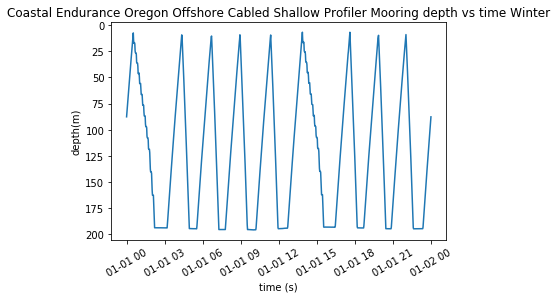

In [380]:
plt.plot(timea,pa)
plt.xlabel('time (s)')
plt.ylabel('depth(m)')
plt.title('Coastal Endurance Oregon Offshore Cabled Shallow Profiler Mooring depth vs time Winter')
plt.gca().invert_yaxis()
plt.xticks(rotation=30)
plt.show

In [342]:
N1=getNumberofDives(pa)
print(N1)

9


<function matplotlib.pyplot.show(*args, **kw)>

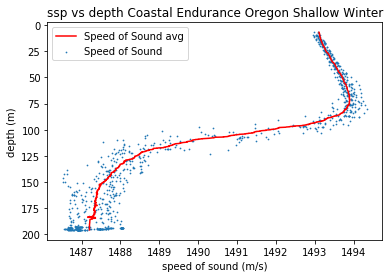

In [381]:
#plot the moving average + scatter
bins, average = moving_average(p1,ssp1,.1,20)
plt.scatter(ssp1,p1, label="Speed of Sound", s=.5)
plt.plot(average, bins, label="Speed of Sound avg", color='red' )
plt.ylabel('depth (m)')
plt.xlabel('speed of sound (m/s)')
plt.title('ssp vs depth Coastal Endurance Oregon Shallow Winter')
plt.gca().invert_yaxis()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

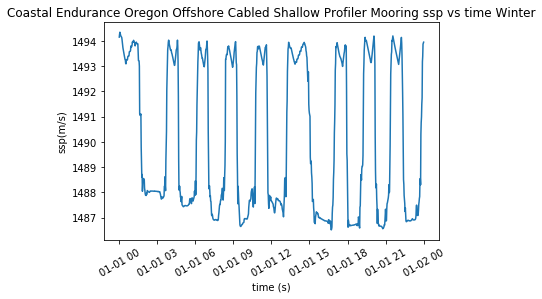

In [382]:
plt.plot(timea,ssp1)
plt.xlabel('time (s)')
plt.ylabel('ssp(m/s)')
plt.title('Coastal Endurance Oregon Offshore Cabled Shallow Profiler Mooring ssp vs time Winter')
plt.xticks(rotation=30)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

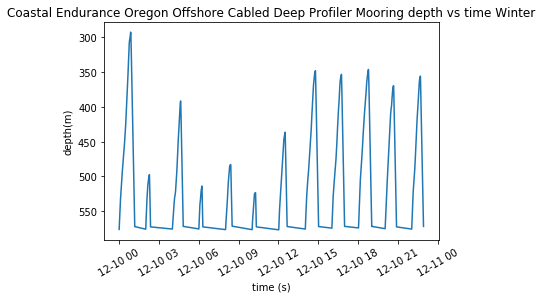

In [383]:
plt.plot(timeb,pb)
plt.xlabel('time (s)')
plt.ylabel('depth(m)')
plt.title('Coastal Endurance Oregon Offshore Cabled Deep Profiler Mooring depth vs time Winter')
plt.gca().invert_yaxis()
plt.xticks(rotation=30)
plt.show

In [346]:
N2=getNumberofDives(pb)
print(N2)

12


<function matplotlib.pyplot.show(*args, **kw)>

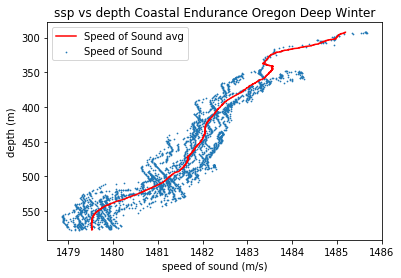

In [384]:
#plot the moving average + scatter
bins, average = moving_average(p2,ssp2,.1,20)
plt.scatter(ssp2,p2, label="Speed of Sound", s=.5)
plt.plot(average, bins, label="Speed of Sound avg", color='red' )
plt.ylabel('depth (m)')
plt.xlabel('speed of sound (m/s)')
plt.title('ssp vs depth Coastal Endurance Oregon Deep Winter')
plt.gca().invert_yaxis()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

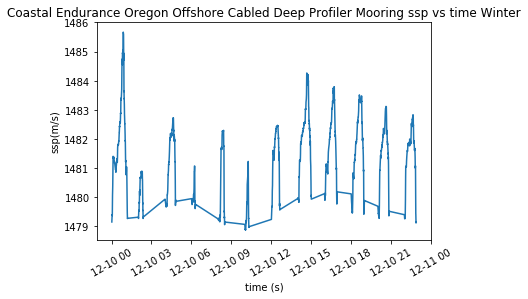

In [385]:
plt.plot(timeb,ssp2)
plt.xlabel('time (s)')
plt.ylabel('ssp(m/s)')
plt.title('Coastal Endurance Oregon Offshore Cabled Deep Profiler Mooring ssp vs time Winter')
plt.xticks(rotation=30)
plt.show

Processing data fast mode

9


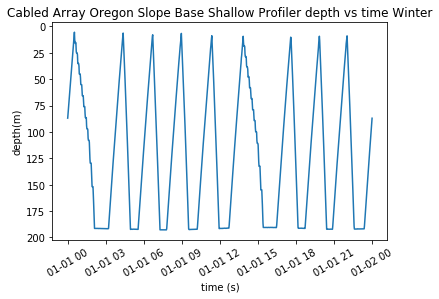

In [349]:
timec = []
tc = []
pc = []
sc = []

for i in range(len(dc)):
    timec.append(ntp_seconds_to_datetime(dc[i]['time']-28800))
    tc.append(dc[i]['seawater_temperature'])
    pc.append(dc[i]['seawater_pressure'])
    sc.append(dc[i]['practical_salinity'])

t3 = np.array(tc)
p3 = np.array(pc)
s3 = np.array(sc)

ssp3=1449.2+4.6*t3-0.055*t3**2+0.00029*t3**3+(1.34-0.01*t3)*(s3-35)+0.016*p3

plt.plot(timec,pc)
plt.xlabel('time (s)')
plt.ylabel('depth(m)')
plt.title('Cabled Array Oregon Slope Base Shallow Profiler depth vs time Winter')
plt.gca().invert_yaxis()
plt.xticks(rotation=30)
plt.show

N3=getNumberofDives(pc)
print(N3)

<function matplotlib.pyplot.show(*args, **kw)>

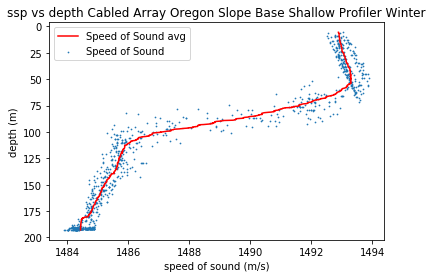

In [350]:
#plot the moving average + scatter
bins, average = moving_average(p3,ssp3,.1,20)
plt.scatter(ssp3,p3, label="Speed of Sound", s=.5)
plt.plot(average, bins, label="Speed of Sound avg", color='red' )
plt.ylabel('depth (m)')
plt.xlabel('speed of sound (m/s)')
plt.title('ssp vs depth Cabled Array Oregon Slope Base Shallow Profiler Winter')
plt.gca().invert_yaxis()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

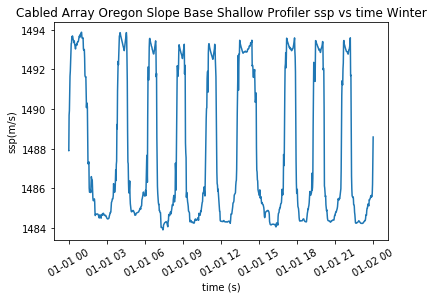

In [351]:
plt.plot(timec,ssp3)
plt.xlabel('time (s)')
plt.ylabel('ssp(m/s)')
plt.title('Cabled Array Oregon Slope Base Shallow Profiler ssp vs time Winter')
plt.xticks(rotation=30)
plt.show

1


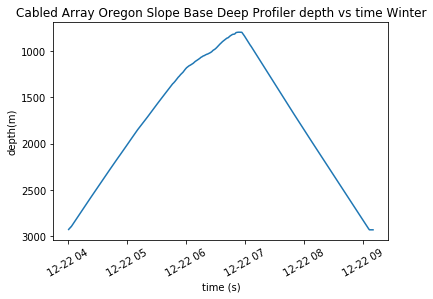

In [352]:
timed = []
td = []
pd = []
sd = []

for i in range(len(dd)):
    timed.append(ntp_seconds_to_datetime(dd[i]['time']-28800))
    td.append(dd[i]['temp'])
    pd.append(dd[i]['pressure'])
    sd.append(dd[i]['practical_salinity'])

t4 = np.array(td)
p4 = np.array(pd)
s4 = np.array(sd)

ssp4=1449.2+4.6*t4-0.055*t4**2+0.00029*t4**3+(1.34-0.01*t4)*(s4-35)+0.016*p4

plt.plot(timed,pd)
plt.xlabel('time (s)')
plt.ylabel('depth(m)')
plt.title('Cabled Array Oregon Slope Base Deep Profiler depth vs time Winter')
plt.gca().invert_yaxis()
plt.xticks(rotation=30)
plt.show

N4=getNumberofDives(pd)
print(N4)

<function matplotlib.pyplot.show(*args, **kw)>

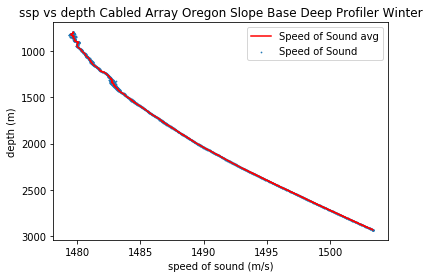

In [353]:
#plot the moving average + scatter
bins, average = moving_average(p4,ssp4,.1,20)
plt.scatter(ssp4,p4, label="Speed of Sound", s=.5)
plt.plot(average, bins, label="Speed of Sound avg", color='red' )
plt.ylabel('depth (m)')
plt.xlabel('speed of sound (m/s)')
plt.title('ssp vs depth Cabled Array Oregon Slope Base Deep Profiler Winter')
plt.gca().invert_yaxis()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

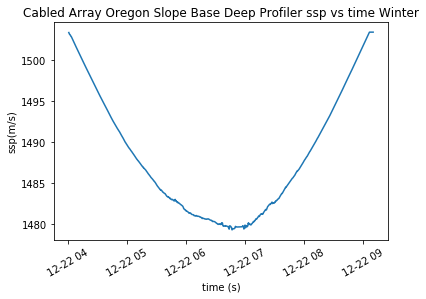

In [354]:
plt.plot(timed,ssp4)
plt.xlabel('time (s)')
plt.ylabel('ssp(m/s)')
plt.title('Cabled Array Oregon Slope Base Deep Profiler ssp vs time Winter')
plt.xticks(rotation=30)
plt.show

9


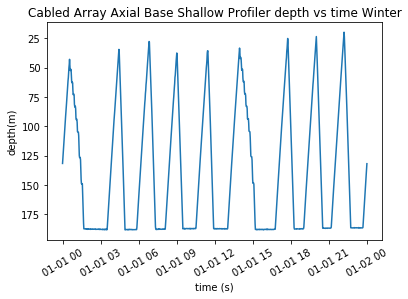

In [355]:
timee = []
te = []
pe = []
se = []

for i in range(len(de)):
    timee.append(ntp_seconds_to_datetime(de[i]['time']-28800))
    te.append(de[i]['seawater_temperature'])
    pe.append(de[i]['seawater_pressure'])
    se.append(de[i]['practical_salinity'])

t5 = np.array(te)
p5 = np.array(pe)
s5 = np.array(se)

ssp5=1449.2+4.6*t5-0.055*t5**2+0.00029*t5**3+(1.34-0.01*t5)*(s5-35)+0.016*p5

plt.plot(timee,p5)
plt.xlabel('time (s)')
plt.ylabel('depth(m)')
plt.title('Cabled Array Axial Base Shallow Profiler depth vs time Winter')
plt.gca().invert_yaxis()
plt.xticks(rotation=30)
plt.show

N5=getNumberofDives(p5)
print(N5)



<function matplotlib.pyplot.show(*args, **kw)>

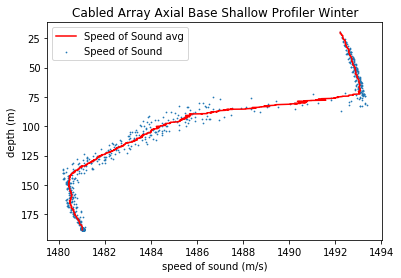

In [356]:
#plot the moving average + scatter
bins, average = moving_average(p5,ssp5,.1,5)
plt.scatter(ssp5,p5, label="Speed of Sound", s=.5)
plt.plot(average, bins, label="Speed of Sound avg", color='red' )
plt.ylabel('depth (m)')
plt.xlabel('speed of sound (m/s)')
plt.title('Cabled Array Axial Base Shallow Profiler Winter')
plt.gca().invert_yaxis()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

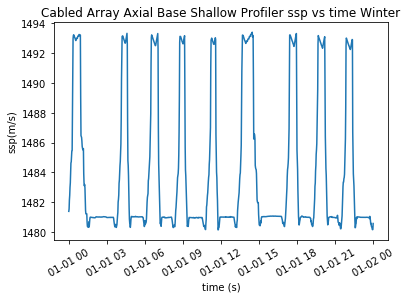

In [357]:
plt.plot(timee,ssp5)
plt.xlabel('time (s)')
plt.ylabel('ssp(m/s)')
plt.title('Cabled Array Axial Base Shallow Profiler ssp vs time Winter')
plt.xticks(rotation=30)
plt.show

2


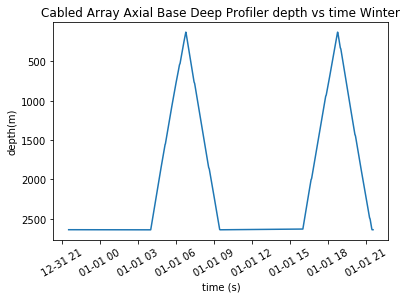

In [358]:
timef = []
tf = []
pf = []
sf = []

for i in range(len(df)):
    timef.append(ntp_seconds_to_datetime(df[i]['time']-28800))
    tf.append(df[i]['temp'])
    pf.append(df[i]['pressure'])
    sf.append(df[i]['practical_salinity'])

t6 = np.array(tf)
p6 = np.array(pf)
s6 = np.array(sf)

ssp6=1449.2+4.6*t6-0.055*t6**2+0.00029*t6**3+(1.34-0.01*t6)*(s6-35)+0.016*p6

plt.plot(timef,p6)
plt.xlabel('time (s)')
plt.ylabel('depth(m)')
plt.title('Cabled Array Axial Base Deep Profiler depth vs time Winter')
plt.gca().invert_yaxis()
plt.xticks(rotation=30)
plt.show

N6=getNumberofDives(p6)
print(N6)

<function matplotlib.pyplot.show(*args, **kw)>

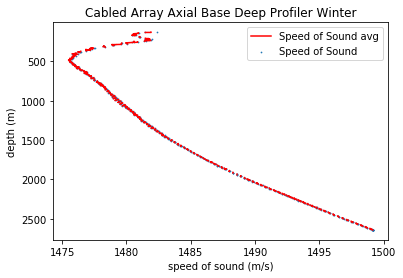

In [359]:
#plot the moving average + scatter
bins, average = moving_average(p6,ssp6,.1,5)
plt.scatter(ssp6,p6, label="Speed of Sound", s=.5)
plt.plot(average, bins, label="Speed of Sound avg", color='red' )
plt.ylabel('depth (m)')
plt.xlabel('speed of sound (m/s)')
plt.title('Cabled Array Axial Base Deep Profiler Winter')
plt.gca().invert_yaxis()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

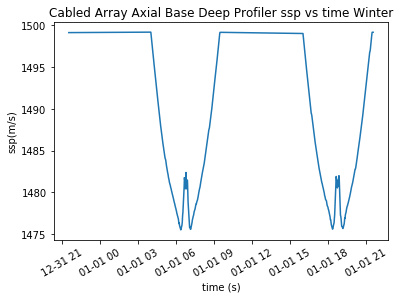

In [360]:
plt.plot(timef,ssp6)
plt.xlabel('time (s)')
plt.ylabel('ssp(m/s)')
plt.title('Cabled Array Axial Base Deep Profiler ssp vs time Winter')
plt.xticks(rotation=30)
plt.show

9


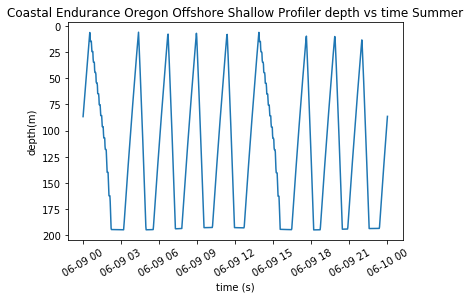

In [361]:
timeg = []
tg = []
pg = []
sg = []

for i in range(len(dg)):
    timeg.append(ntp_seconds_to_datetime(dg[i]['time']-28800))
    tg.append(dg[i]['seawater_temperature'])
    pg.append(dg[i]['seawater_pressure'])
    sg.append(dg[i]['practical_salinity'])

t7 = np.array(tg)
p7 = np.array(pg)
s7 = np.array(sg)

ssp7=1449.2+4.6*t7-0.055*t7**2+0.00029*t7**3+(1.34-0.01*t7)*(s7-35)+0.016*p7

plt.plot(timeg,pg)
plt.xlabel('time (s)')
plt.ylabel('depth(m)')
plt.title('Coastal Endurance Oregon Offshore Shallow Profiler depth vs time Summer')
plt.gca().invert_yaxis()
plt.xticks(rotation=30)
plt.show

N7=getNumberofDives(p7)
print(N7)

<function matplotlib.pyplot.show(*args, **kw)>

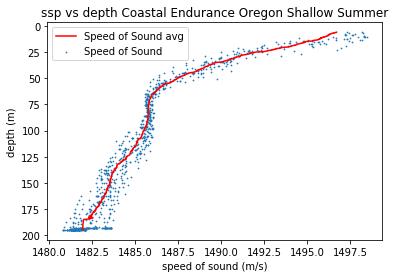

In [386]:
#plot the moving average + scatter
bins, average = moving_average(p7,ssp7,.1,20)
plt.scatter(ssp7,p7, label="Speed of Sound", s=.5)
plt.plot(average, bins, label="Speed of Sound avg", color='red' )
plt.ylabel('depth (m)')
plt.xlabel('speed of sound (m/s)')
plt.title('ssp vs depth Coastal Endurance Oregon Shallow Summer')
plt.gca().invert_yaxis()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

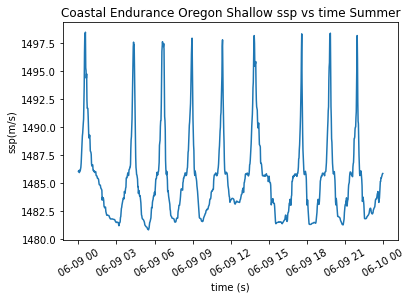

In [387]:
plt.plot(timeg,ssp7)
plt.xlabel('time (s)')
plt.ylabel('ssp(m/s)')
plt.title('Coastal Endurance Oregon Shallow ssp vs time Summer')
plt.xticks(rotation=30)
plt.show

4


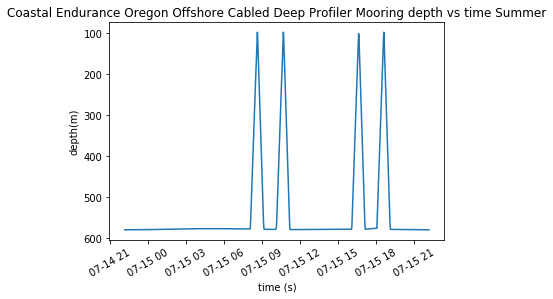

In [388]:
timeh = []
th = []
ph = []
sh = []

for i in range(len(dh)):
    timeh.append(ntp_seconds_to_datetime(dh[i]['time']-28800))
    th.append(dh[i]['temp'])
    ph.append(dh[i]['pressure'])
    sh.append(dh[i]['practical_salinity'])

t8 = np.array(th)
p8 = np.array(ph)
s8 = np.array(sh)

ssp8=1449.2+4.6*t8-0.055*t8**2+0.00029*t8**3+(1.34-0.01*t8)*(s8-35)+0.016*p8

plt.plot(timeh,ph)
plt.xlabel('time (s)')
plt.ylabel('depth(m)')
plt.title('Coastal Endurance Oregon Offshore Cabled Deep Profiler Mooring depth vs time Summer')
plt.gca().invert_yaxis()
plt.xticks(rotation=30)
plt.show

N8=getNumberofDives(p8)
print(N8)

<function matplotlib.pyplot.show(*args, **kw)>

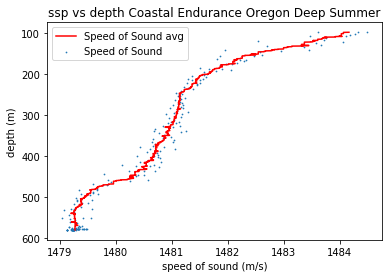

In [389]:
#plot the moving average + scatter
bins, average = moving_average(p8,ssp8,.1,20)
plt.scatter(ssp8,p8, label="Speed of Sound", s=.5)
plt.plot(average, bins, label="Speed of Sound avg", color='red' )
plt.ylabel('depth (m)')
plt.xlabel('speed of sound (m/s)')
plt.title('ssp vs depth Coastal Endurance Oregon Deep Summer')
plt.gca().invert_yaxis()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

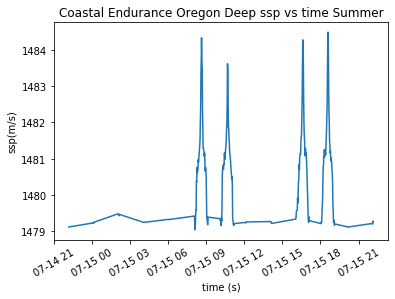

In [390]:
plt.plot(timeh,ssp8)
plt.xlabel('time (s)')
plt.ylabel('ssp(m/s)')
plt.title('Coastal Endurance Oregon Deep ssp vs time Summer')
plt.xticks(rotation=30)
plt.show

9


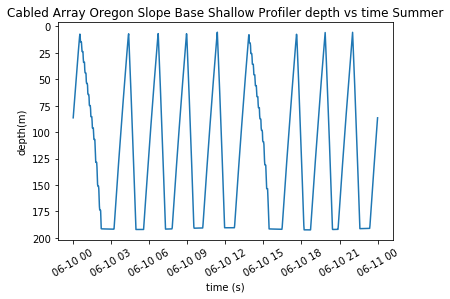

In [367]:
timei = []
ti = []
pi = []
si = []

for i in range(len(di)):
    timei.append(ntp_seconds_to_datetime(di[i]['time']-28800))
    ti.append(di[i]['seawater_temperature'])
    pi.append(di[i]['seawater_pressure'])
    si.append(di[i]['practical_salinity'])

t9 = np.array(ti)
p9 = np.array(pi)
s9 = np.array(si)

ssp9=1449.2+4.6*t9-0.055*t9**2+0.00029*t9**3+(1.34-0.01*t9)*(s9-35)+0.016*p9

plt.plot(timei,pi)
plt.xlabel('time (s)')
plt.ylabel('depth(m)')
plt.title('Cabled Array Oregon Slope Base Shallow Profiler depth vs time Summer')
plt.gca().invert_yaxis()
plt.xticks(rotation=30)
plt.show

N9=getNumberofDives(p9)
print(N9)

<function matplotlib.pyplot.show(*args, **kw)>

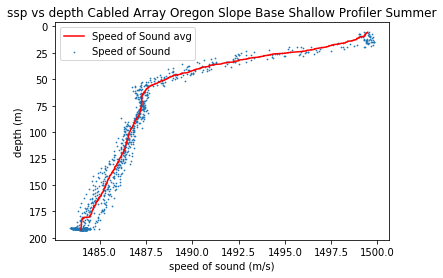

In [368]:
#plot the moving average + scatter
bins, average = moving_average(p9,ssp9,.1,20)
plt.scatter(ssp9,p9, label="Speed of Sound", s=.5)
plt.plot(average, bins, label="Speed of Sound avg", color='red' )
plt.ylabel('depth (m)')
plt.xlabel('speed of sound (m/s)')
plt.title('ssp vs depth Cabled Array Oregon Slope Base Shallow Profiler Summer')
plt.gca().invert_yaxis()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

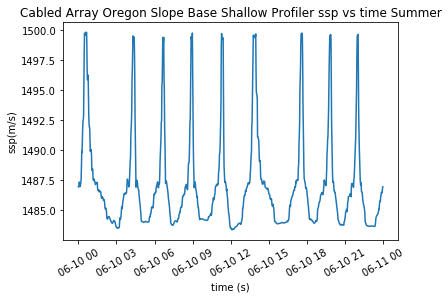

In [369]:
plt.plot(timei,ssp9)
plt.xlabel('time (s)')
plt.ylabel('ssp(m/s)')
plt.title('Cabled Array Oregon Slope Base Shallow Profiler ssp vs time Summer')
plt.xticks(rotation=30)
plt.show

2


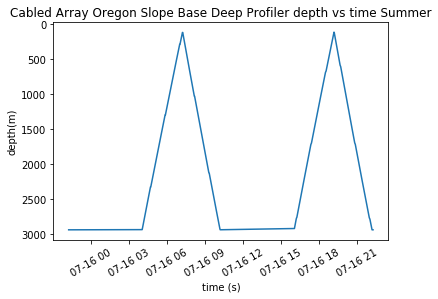

In [370]:
timej = []
tj = []
pj = []
sj = []

for i in range(len(dj)):
    timej.append(ntp_seconds_to_datetime(dj[i]['time']-28800))
    tj.append(dj[i]['temp'])
    pj.append(dj[i]['pressure'])
    sj.append(dj[i]['practical_salinity'])

t10 = np.array(tj)
p10 = np.array(pj)
s10 = np.array(sj)

ssp10=1449.2+4.6*t10-0.055*t10**2+0.00029*t10**3+(1.34-0.01*t10)*(s10-35)+0.016*p10

plt.plot(timej,pj)
plt.xlabel('time (s)')
plt.ylabel('depth(m)')
plt.title('Cabled Array Oregon Slope Base Deep Profiler depth vs time Summer')
plt.gca().invert_yaxis()
plt.xticks(rotation=30)
plt.show

N10=getNumberofDives(p10)
print(N10)

<function matplotlib.pyplot.show(*args, **kw)>

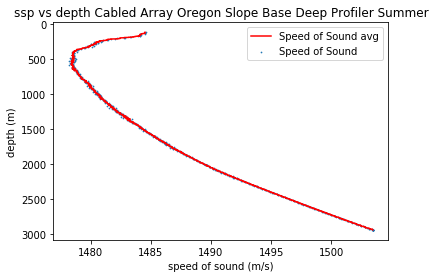

In [371]:
#plot the moving average + scatter
bins, average = moving_average(p10,ssp10,.1,20)
plt.scatter(ssp10,p10, label="Speed of Sound", s=.5)
plt.plot(average, bins, label="Speed of Sound avg", color='red' )
plt.ylabel('depth (m)')
plt.xlabel('speed of sound (m/s)')
plt.title('ssp vs depth Cabled Array Oregon Slope Base Deep Profiler Summer')
plt.gca().invert_yaxis()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

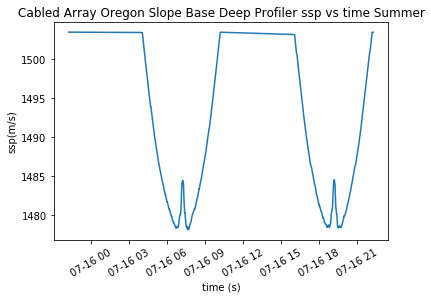

In [372]:
plt.plot(timej,ssp10)
plt.xlabel('time (s)')
plt.ylabel('ssp(m/s)')
plt.title('Cabled Array Oregon Slope Base Deep Profiler ssp vs time Summer')
plt.xticks(rotation=30)
plt.show

8


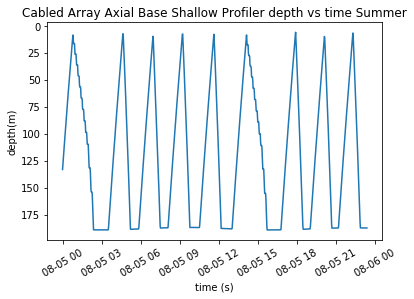

In [373]:
timek = []
tk = []
pk = []
sk = []

for i in range(len(dk)):
    timek.append(ntp_seconds_to_datetime(dk[i]['time']-28800))
    tk.append(dk[i]['seawater_temperature'])
    pk.append(dk[i]['seawater_pressure'])
    sk.append(dk[i]['practical_salinity'])

t11 = np.array(tk)
p11 = np.array(pk)
s11 = np.array(sk)

ssp11=1449.2+4.6*t11-0.055*t11**2+0.00029*t11**3+(1.34-0.01*t11)*(s11-35)+0.016*p11

plt.plot(timek,p11)
plt.xlabel('time (s)')
plt.ylabel('depth(m)')
plt.title('Cabled Array Axial Base Shallow Profiler depth vs time Summer')
plt.gca().invert_yaxis()
plt.xticks(rotation=30)
plt.show

N11=getNumberofDives(p11)
print(N11)

<function matplotlib.pyplot.show(*args, **kw)>

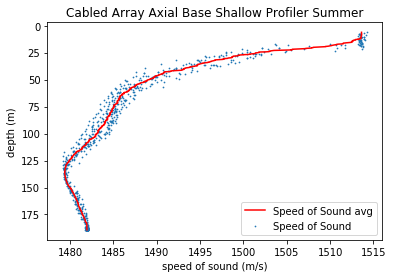

In [374]:
#plot the moving average + scatter
bins, average = moving_average(p11,ssp11,.1,10)
plt.scatter(ssp11,p11, label="Speed of Sound", s=.5)
plt.plot(average, bins, label="Speed of Sound avg", color='red' )
plt.ylabel('depth (m)')
plt.xlabel('speed of sound (m/s)')
plt.title('Cabled Array Axial Base Shallow Profiler Summer')
plt.gca().invert_yaxis()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

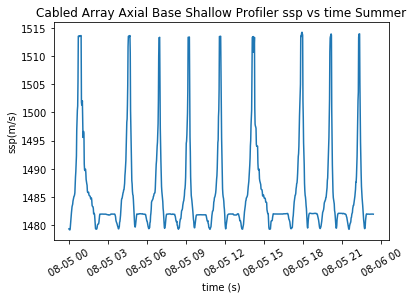

In [375]:
plt.plot(timek,ssp11)
plt.xlabel('time (s)')
plt.ylabel('ssp(m/s)')
plt.title('Cabled Array Axial Base Shallow Profiler ssp vs time Summer')
plt.xticks(rotation=30)
plt.show

2


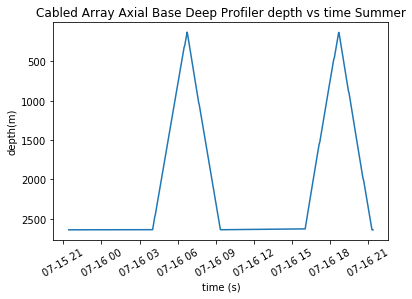

In [376]:
timel = []
tl = []
pl = []
sl = []

for i in range(len(dl)):
    timel.append(ntp_seconds_to_datetime(dl[i]['time']-28800))
    tl.append(dl[i]['temp'])
    pl.append(dl[i]['pressure'])
    sl.append(dl[i]['practical_salinity'])

t12 = np.array(tl)
p12 = np.array(pl)
s12 = np.array(sl)

ssp12=1449.2+4.6*t12-0.055*t12**2+0.00029*t12**3+(1.34-0.01*t12)*(s12-35)+0.016*p12

plt.plot(timel,p12)
plt.xlabel('time (s)')
plt.ylabel('depth(m)')
plt.title('Cabled Array Axial Base Deep Profiler depth vs time Summer')
plt.gca().invert_yaxis()
plt.xticks(rotation=30)
plt.show

N12=getNumberofDives(p12)
print(N12)

<function matplotlib.pyplot.show(*args, **kw)>

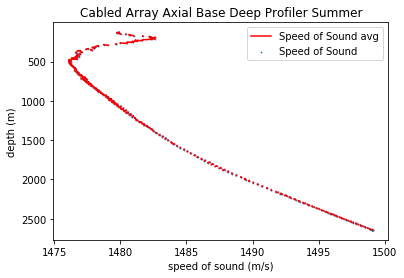

In [377]:
#plot the moving average + scatter
bins, average = moving_average(p12,ssp12,.1,5)
plt.scatter(ssp12,p12, label="Speed of Sound", s=.5)
plt.plot(average, bins, label="Speed of Sound avg", color='red' )
plt.ylabel('depth (m)')
plt.xlabel('speed of sound (m/s)')
plt.title('Cabled Array Axial Base Deep Profiler Summer')
plt.gca().invert_yaxis()
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

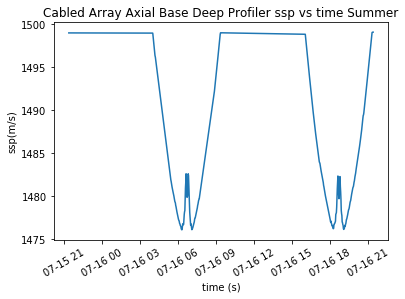

In [378]:
plt.plot(timel,ssp12)
plt.xlabel('time (s)')
plt.ylabel('ssp(m/s)')
plt.title('Cabled Array Axial Base Deep Profiler ssp vs time Summer')
plt.xticks(rotation=30)
plt.show